In [26]:
# Jupyter-notebook specific extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Load in relevant packages
from fastai import *
from fastai.vision import *

In [28]:
def acc_camvid(inp, target): ## Have to include this here since saving the model did not include this for some reason
    pass

In [29]:
# Load in the learner object
pred_model = load_learner('./models', file='camvid-final.pkl')

In [30]:
# Download three images that I captured
!wget -O img1.jpg https://www.dropbox.com/s/i1wn3duwjcq7mq5/IMG_20190930_135511.jpg?dl=1
!wget -O img2.jpg https://www.dropbox.com/s/8bjear3zrmwx7a0/IMG_20190930_135517.jpg?dl=1
!wget -O img3.jpg https://www.dropbox.com/s/48leuma6s4l97m1/IMG_20190930_135527.jpg?dl=1

--2019-10-01 06:23:44--  https://www.dropbox.com/s/i1wn3duwjcq7mq5/IMG_20190930_135511.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/i1wn3duwjcq7mq5/IMG_20190930_135511.jpg [following]
--2019-10-01 06:23:44--  https://www.dropbox.com/s/dl/i1wn3duwjcq7mq5/IMG_20190930_135511.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfcb83735aa69118b3a5da691f2.dl.dropboxusercontent.com/cd/0/get/ApmpkoKfqYCQTVG16fvLNIkGzSZ5wIsu1Mos989klX0b0RTbmS1oL5rkSQAVSuan_uYyb4Dw15L_JTTaivmlVkcEUZz8ZVLJ-U2t3rFkg7rOLHJKwZbYMwZrl0hpe9clI1E/file?dl=1# [following]
--2019-10-01 06:23:44--  https://ucfcb83735aa69118b3a5da691f2.dl.dropboxusercontent.com/cd/0/get/ApmpkoKfqYCQTVG16fvLNIkGzSZ5wIsu1Mos989klX0b0RTbmS1oL5rkSQAVSuan_uYyb4Dw15L_JTT

In [31]:
# Run each image through the model
img1 = open_image('./img1.jpg')
img1_out = img1.resize((3, 720, 960))

In [32]:
out = pred_model.predict(img1_out)

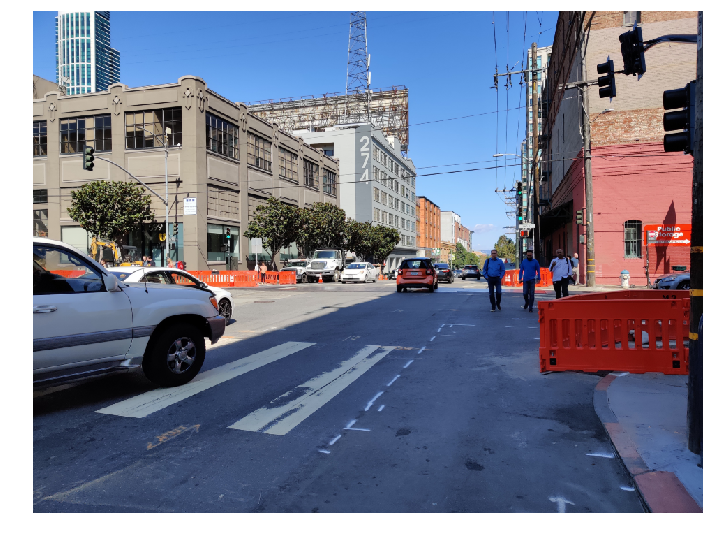

In [33]:
img1_out.show(figsize=(12,12))

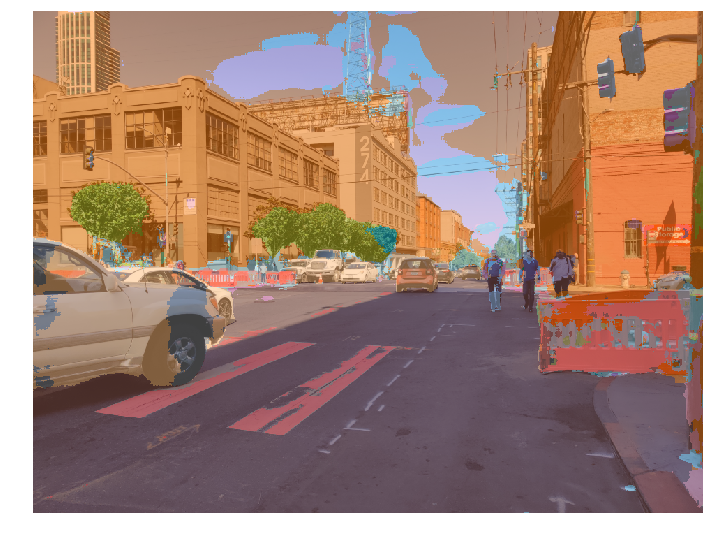

In [34]:
img1_out.show(figsize=(12,12), y=out[0])

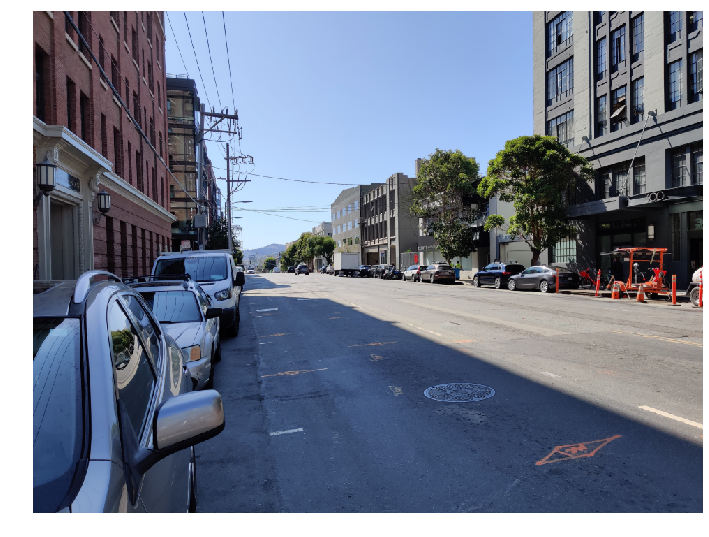

In [35]:
# Second image
img2 = open_image('./img2.jpg').resize((3, 720, 960))
out = pred_model.predict(img2)
img2.show(figsize=(12, 12))

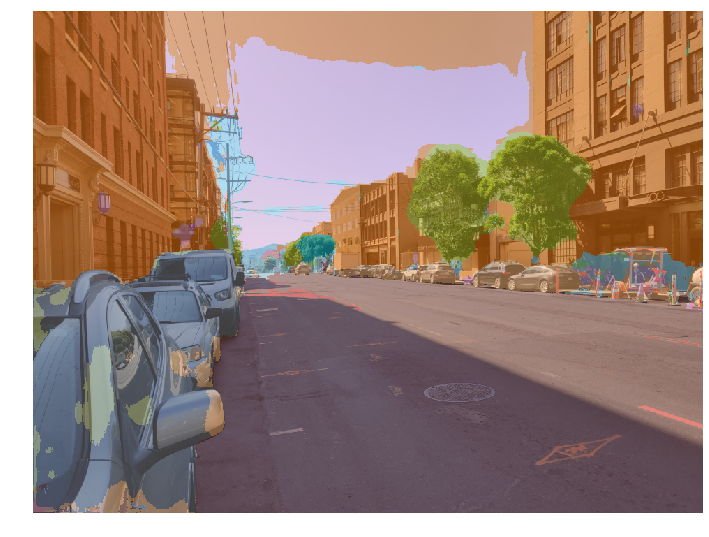

In [36]:
img2.show(figsize=(12,12), y=out[0])

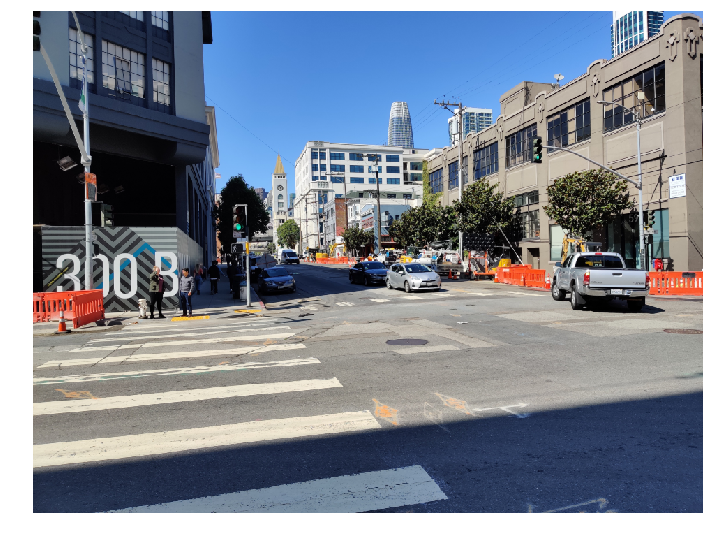

In [37]:
# Last image
img3 = open_image('./img3.jpg').resize((3, 720, 960))
out = pred_model.predict(img3)
img3.show(figsize=(12,12))

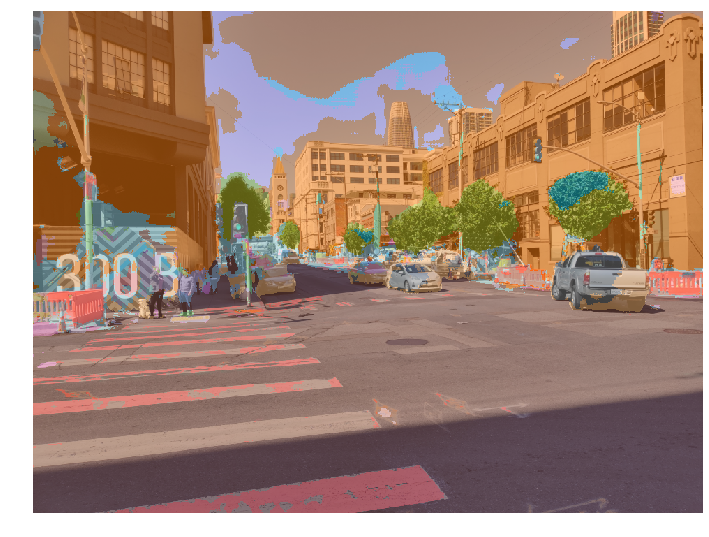

In [38]:
img3.show(figsize=(12,12), y=out[0])

# Question #1

The quality of the predictions on the holdout dataset was generally good for roads, markers, buildings and trees.  Where it failed were the pedestrians and cars.  Sometimes, the label for building bled into the label for sky.

# Question #2
The main difference between the images from CAMVID and this holdout dataset was the illumination between the views.  Even if we mean subtract, the image statistics between the images for the holdout set compared to the images from ImageNet are quite different.  One approach instead would be include images with multiple contrasts, brightnesses and illuminations to account for this.  This can be done by modifying `get_transforms()` for data augmentation to have more variation in the illumination, brightness, etc.

The other crucial difference is the image size.  The images in the holdout set were captured by a 12 MP camera compared to the original images which are slightly larger than 0.5MP.  By resizing the images, the objects would become artificially smaller, which may give the classification model a hard time to perform segmentation with.  Therefore, instead of resizing naively, cropping may work better as the aspect ratio of the images remains intact.  Hopefully the performance of the classifier can do better.

